In [1]:
import numpy as np
import pandas as pd
import os
import theano
from theano import tensor as T
import matplotlib.pyplot as plt

In [2]:
x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()
z1 = x1 * w1 + w0

net_input = theano.function(inputs = [x1, w1, w0],
                            outputs = z1)

print('Net_input: %.2f' % net_input(2.0,1.0,0.5))

Net_input: 2.50


In [3]:
# configuration of theano
#print(theano.config.floatX)
#theano.config.floatX = 'float64'
print(theano.config.floatX)

float64


In [4]:
# Globally set the configuration
'''export THEANO_FLAGS=floatX=float32 python test.py'''

'export THEANO_FLAGS=floatX=float32 python test.py'

In [5]:
# Configure the device
print(theano.config.device)

cpu


In [6]:
# In Bash
'''export THEANO_FLAGS=device=cpu,floatX=float32 python test.py'''

# Create .theanorc file
'''echo -e "\n[global]\nfloatX=float32\ndevice=gpu\n" >> ~/.theanorc'''

'echo -e "\n[global]\nfloatX=float32\ndevice=gpu\n" >> ~/.theanorc'

In [7]:
# Working with arrays structure
x = T.dmatrix(name='x')
x_sum = T.sum(x, axis = 0)

calc_sum = theano.function(inputs = [x], outputs = x_sum)

# Using python list
ary = [[1,2,3],[1,2,3]]
print('Column sum list:', calc_sum(ary))

# Using numpy array
ary = np.array([[1,2,3],[1,2,3]], dtype=theano.config.floatX)
print('Column sum np array:', calc_sum(ary))

Column sum list: [ 2.  4.  6.]
Column sum np array: [ 2.  4.  6.]


In [8]:
# Memory management in theano using shared: allows to spead large objects and grants multiple read/ write

data = np.array([[1,2,3]], dtype = theano.config.floatX)

x = T.dmatrix('x')
w = theano.shared(np.asarray([[0.0,0.0,0.0]], dtype = theano.config.floatX))    
z = x.dot(w.T)

update = [[w, w + 1.0]]

net_input = theano.function(inputs = [x],
                            updates = update, 
                            outputs = z)


for i in range(5):
    print('z%d: ' % i, net_input(data))
    

z0:  [[ 0.]]
z1:  [[ 6.]]
z2:  [[ 12.]]
z3:  [[ 18.]]
z4:  [[ 24.]]


In [9]:
# Using givens
data = np.array([[1,2,3]], dtype = theano.config.floatX)

x = T.dmatrix('x')
w = theano.shared(np.asarray([[0.0,0.0,0.0]], dtype = theano.config.floatX))   
z = x.dot(w.T)
update = [[w, w + 1.0]]

net_input = theano.function(inputs = [],
                            updates = update, 
                            givens = {x:data},
                            outputs = z)

print('Using givens')
for i in range(5):
    print('z%d: ' % i, net_input())

Using givens
z0:  [[ 0.]]
z1:  [[ 6.]]
z2:  [[ 12.]]
z3:  [[ 18.]]
z4:  [[ 24.]]


In [10]:
# Linear regression example 

# Let us create some training examples 

X_train = np.array( [ [0.0], [1.0],
                      [2.0], [3.0],
                      [4.0], [5.0],
                      [6.0], [7.0],
                      [8.0], [9.0]], dtype = theano.config.floatX)

y_train = np.array([1.0, 1.3, 
                    3.1, 2.0,
                    5.0, 6.3,
                    7.7, 6.6,
                    8.0, 9.0], dtype = theano.config.floatX)


print('Training data is of dimension %d x %d' % (X_train.shape[0], X_train.shape[1]))
print('Training labels is of dimension %d ' % (len(y_train)))


Training data is of dimension 10 x 1
Training labels is of dimension 10 


### Function: Linear Regression

In [11]:
def train_lin_regr(X_train, y_train, eta, epochs):
    
    costs = []
    eta0 = T.dscalar('eta0')
    y = T.dvector('y')
    X = T.dmatrix('X')
    
    w = theano.shared(np.zeros(shape = (X_train.shape[1] + 1), 
                               dtype = theano.config.floatX), 
                      name= 'w')
    
    # Calculate the cost
    net_input = T.dot(X, w[1:]) + w[0]
    errors = y - net_input
    cost = T.sum(T.pow(errors,2))
    
    # perform gradient
    gradient = T.grad(cost, wrt=w)
    update = [(w, w - eta0 * gradient)]
    
    train = theano.function(inputs = [eta0],
                            outputs = cost,
                            updates  = update,
                            givens = {X:X_train, y:y_train})
    
    for _ in range(epochs):
        costs.append(train(eta))
        
        
    return costs, w


def predict_lin_reg(X,w):
    Xt = T.dmatrix('X')
    net_input = T.dot(Xt,w[1:]) + w[0]
    
    predict = theano.function(inputs = [Xt],
                              outputs = net_input,
                              givens = {w:w})
    
    return predict(X)
    

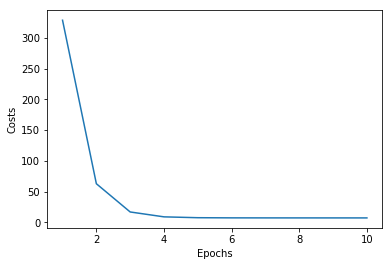

In [12]:
# Perform training on the above examples 

costs, w = train_lin_regr(X_train, y_train, eta = 0.001, epochs = 10)
plt.plot(range(1, len(costs) + 1), costs)
plt.xlabel('Epochs')
plt.ylabel('Costs')
plt.show()

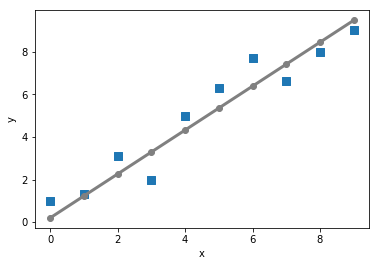

In [13]:
# Perform prediction on test set and plot

plt.scatter(X_train, y_train, marker = 's', s=50)

plt.plot(range(X_train.shape[0]), 
         predict_lin_reg(X_train,w),
         color='gray',
         marker='o',
         linewidth=3)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

### More on theano